![title](img/Lending Club.jpg)

## Company Introduction

* Lending club is a peer to peer lending company based in San Francisco. It offers a platform and a secondary loan trading market to connect borrowers and investors. Reported the largest p2p platform, the company claimed to issue more than 10 billions loans by the end of 2015 and is quickly expanding currently. Lending Club issues unsecured personal loans between \$1,000 and \$40,000, making its profit by charging an orignation fee from borrowers and service fee from investors.

* **Credit Risk**: The company is exposed to default risk, defining as the capital loss when a borrower goes bankrupt and cannot repay its loan

* **Objective**: The key focus of this project is to build predictive models to find out default cases

## Business Model

![title](img/business_model.png)

## Outline

- [Data Preprocessing](#Data-Preprocessing)
- [Exploratory Data Analysis](#EDA) 
- [Feature Engineering](#Feature-Engineering)
- [Model Building and Evaluation](#Modeling-and-Evaluation)
- [Recommendation](#Recommendation)


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
import missingno as msno
import warnings
from pyecharts import Pie
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei'] # Default font 
pd.set_option('display.max_columns', 100) # display max columns

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import roc_auc_score, roc_curve, auc
import itertools
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import Imputer

In [3]:
df = pd.read_csv('data/loan_2012_2013.csv', encoding = 'latin-1', skiprows = 1)

In [4]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,36 months,6.62%,368.45,A,A2,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,105000.0,Not Verified,Dec-2013,Fully Paid,n,NaN,NaN,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-1994,1.0,43.0,NaN,12.0,0.0,13168.0,21.6%,22.0,w,0.0,0.0,13263.954639,13263.95,12000.0,1263.95,0.0,0.0,0.0,Jan-2017,368.20,NaN,Feb-2019,0.0,...,8.0,9.0,2.0,12.0,0.0,0.0,0.0,2.0,95.5,0.0,0.0,0.0,333044.0,42603.0,52600.0,42769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,Area Sales Manager,5 years,MORTGAGE,325000.0,Source Verified,Dec-2013,Fully Paid,n,NaN,NaN,debt_consolidation,Pay off other Installment loan,945xx,CA,18.55,0.0,Nov-1994,1.0,NaN,NaN,15.0,0.0,29581.0,54.6%,31.0,w,0.0,0.0,29150.980000,29150.98,28000.0,1150.98,0.0,0.0,0.0,Aug-2014,23915.86,NaN,Aug-2014,0.0,...,9.0,15.0,5.0,15.0,0.0,0.0,0.0,5.0,100.0,16.7,0.0,0.0,850886.0,199739.0,42200.0,196686.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(188183, 145)

In [6]:
df.dtypes.value_counts()

float64    108
object      37
dtype: int64

* 200k observations and 145 variables, out of which 108 are numerical and 37 categorical.

## Data Preprocessing

- [Completness](#Completeness) : Check missing/null values
- [Uniqueness](#Uniqueness) : Check duplicated entries
- [Validity](#Validity) : Check if data conforms to the syntax (format, type, range) of its definition, check for outliers

### Completeness

In [7]:
def plot_missing(df, thresh = 0):
    '''
    Input: data frame, threshold of missing percentages
    Output: Countplot of missing values
    
    '''
    df_missing = df.apply(lambda x: round(x.isnull().sum() * 100 / len(x),1)).sort_values(ascending = False).reset_index()
    df_missing.columns = ['Variable Name', 'Missing Percentages']
    
    fig, ax = plt.subplots(figsize = (15,8))
    ax = sns.barplot(y = 'Variable Name', x = 'Missing Percentages', 
                     data = df_missing[(df_missing['Missing Percentages'] > thresh)], color = 'r')
    
    ax.set_title('Missing Percentages')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize = 8)
   
    sns.despine()
    plt.tight_layout()
    plt.show()

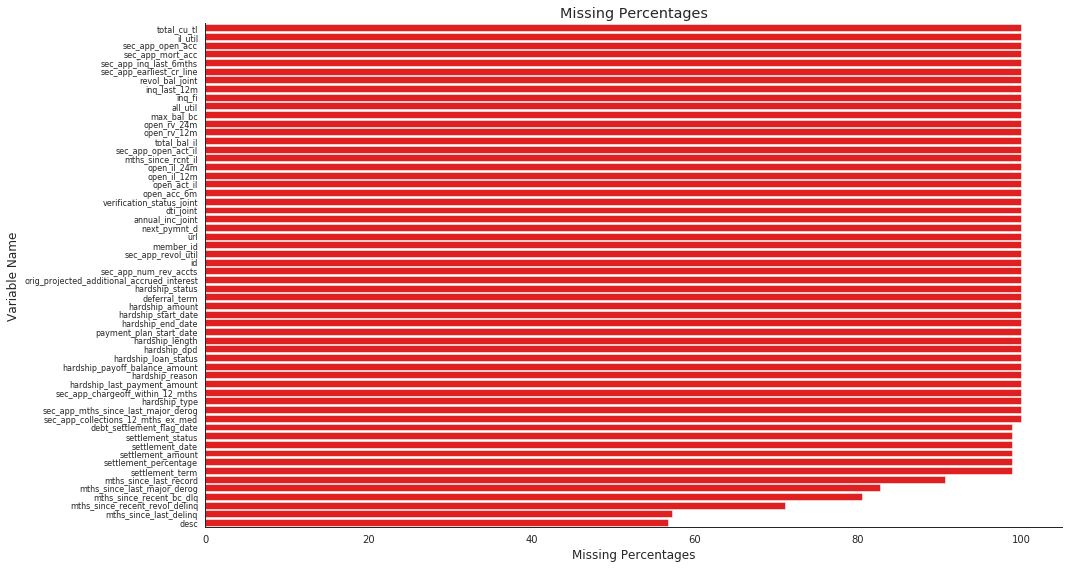

In [8]:
plot_missing(df, 50)

* Debt settlement related variables will be removed since these variables reveal information about loan status. The fact that a customer starts a debt settlement service he/she is already categorized as charged-off`
* `mths_since_last_delinq`: Months since the borrowers last delinquency. Missing probably means it does not have deliquency.
* `delinq_time`: 2 = most recent < 24 months, 1 = most recent > 24, 0 = NA values

In [9]:
def remove_missing(df):
    '''
    This function removes missing values
    
    '''

    # Remove columns with unique value
    df = df.loc[:,df.apply(pd.Series.nunique) != 1]
    
    delinq_time = df.mths_since_last_delinq.fillna(999).apply(lambda x: ((2,1)[x <= 24],0)[x > 156]).astype('object')
    
    # Remove columns with more than 50% missing
    df = df.dropna(thresh = len(df)/2, axis = 1).dropna(how = 'all')
    
    # Create new variables
    df['delinq_time'] = delinq_time
    
    print('After removing, there are {} rows and {} columns left'.format(df.shape[0],df.shape[1]))
    
    return df

In [10]:
df = remove_missing(df)

After removing, there are 188181 rows and 83 columns left


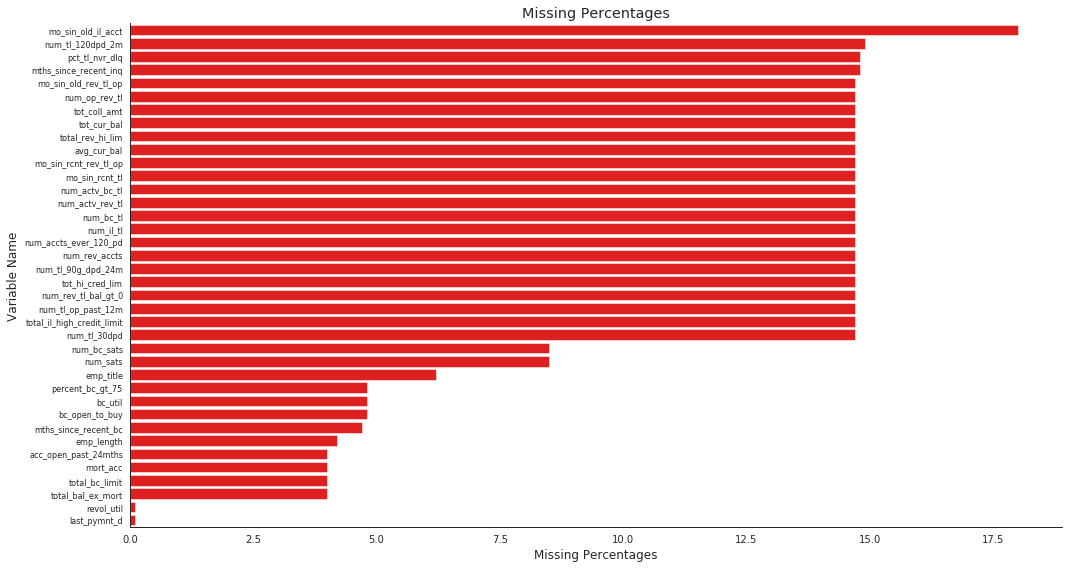

In [11]:
plot_missing(df)

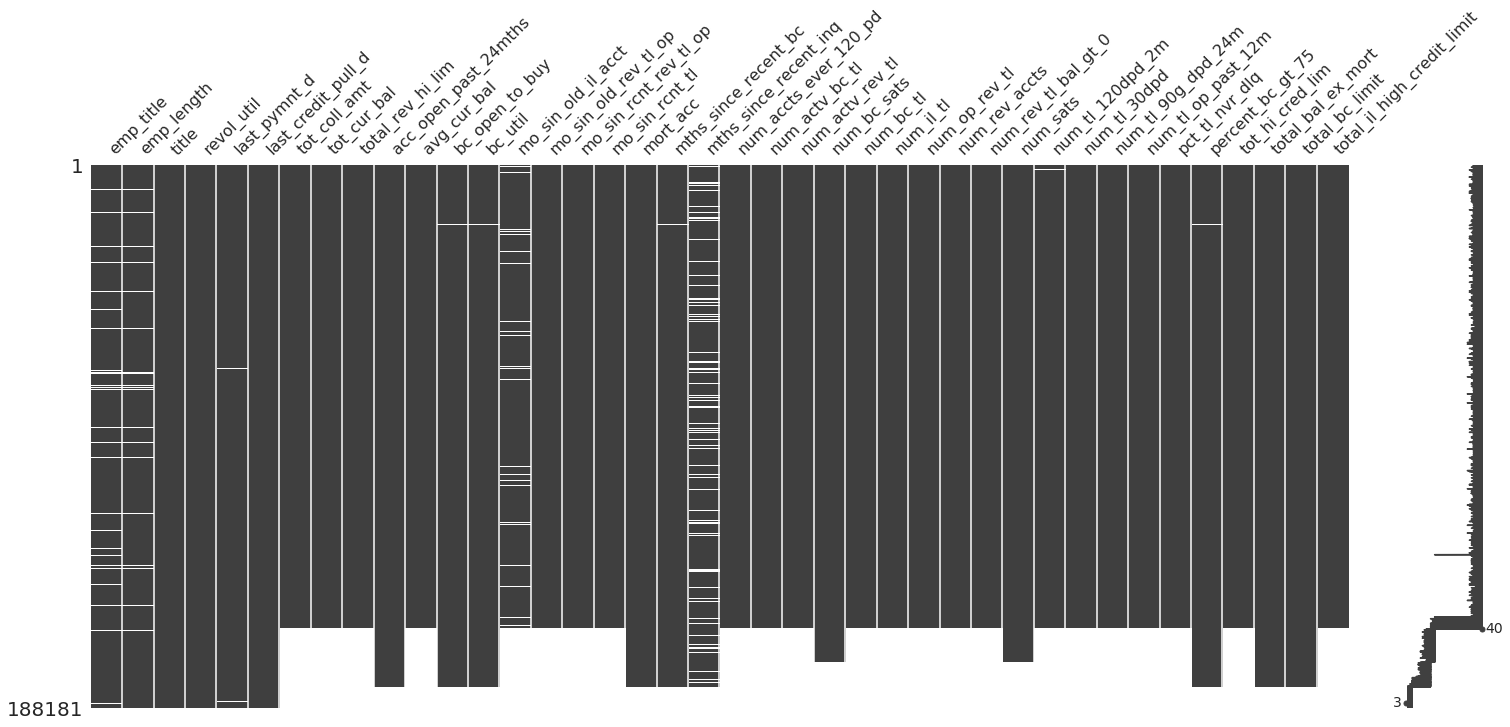

In [12]:
# Check missing pattern
msno.matrix(df.loc[:,df.isnull().any()])
plt.show()

#### Missing - Categorical

In [13]:
df.select_dtypes(include = 'object').head(2)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,debt_settlement_flag,delinq_time
0,36 months,6.62%,A,A2,MANAGER INFORMATION DELIVERY,10+ years,MORTGAGE,Not Verified,Dec-2013,Fully Paid,debt_consolidation,UNIVERSAL CARD,060xx,CT,Mar-1994,21.6%,w,Jan-2017,Feb-2019,N,2
1,36 months,7.62%,A,A3,Area Sales Manager,5 years,MORTGAGE,Source Verified,Dec-2013,Fully Paid,debt_consolidation,Pay off other Installment loan,945xx,CA,Nov-1994,54.6%,w,Aug-2014,Aug-2014,N,0


In [14]:
def clean_cat_data(df):
    '''
    This function cleans dataframe
    
    '''
    # int_rate, revol_util
    df['int_rate'] = df['int_rate'].str.strip('%').astype('float64')
    df['revol_util'] = df['revol_util'].str.strip('%').astype('float64')
    
    # emp_length
    code_dict = {
        'emp_length':{
        '10+ years':10,
        '9 years':9,
        '8 years':8,
        '7 years':7,
        '6 years':6,
        '5 years':5,
        '4 years':4,
        '3 years':3,
        '2 years':2,
        '1 year':1,
        '< 1 year':0,
    }}
    df = df.replace(code_dict)
    
    return df

In [15]:
df = clean_cat_data(df)

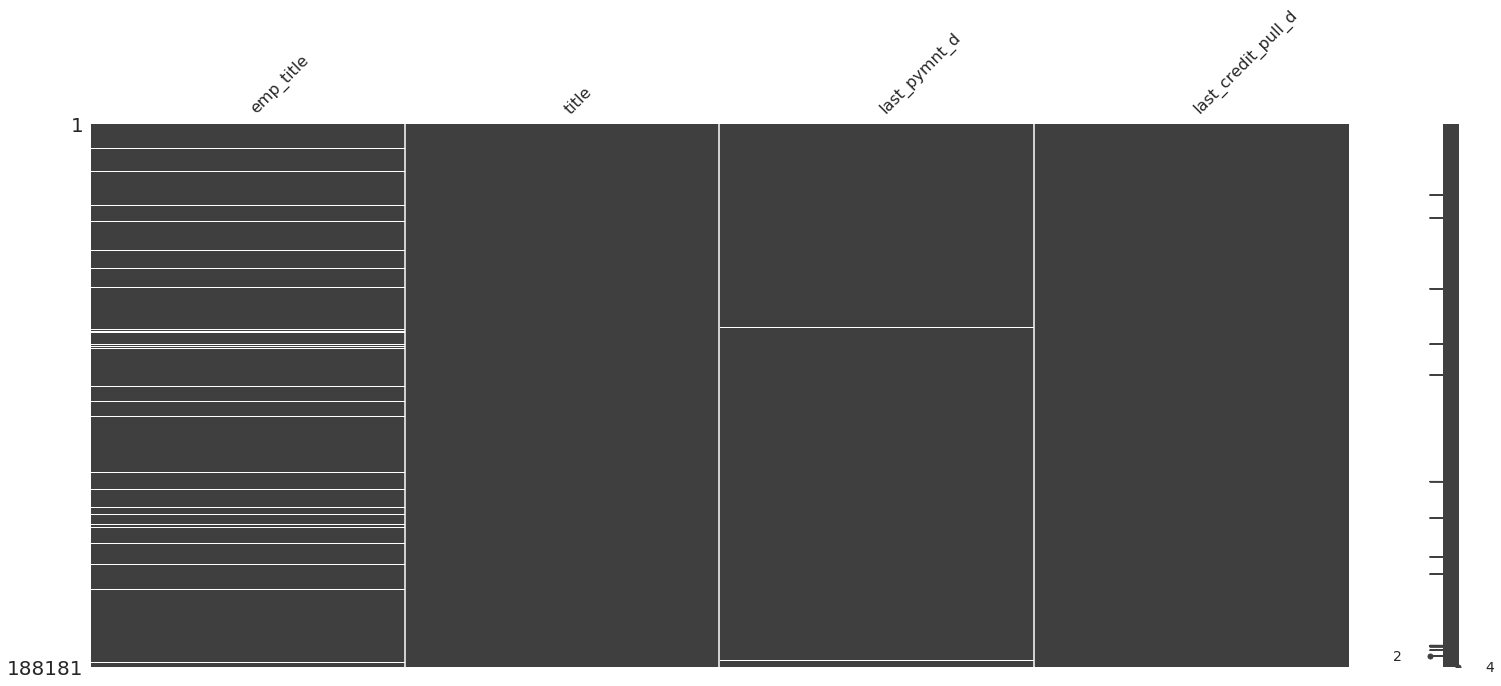

In [16]:
msno.matrix(df.select_dtypes(include = 'object').loc[:,df.isnull().any()])
plt.show()

In [17]:
# Fill NA with unknown
# df[['emp_title', 'title']] = df[['emp_title', 'title']].fillna('unknown')

# Remove last_pymnt_d
df = df[~((df['last_pymnt_d'].isnull()) | (df['last_credit_pull_d'].isnull()))]

#### Missing - Numerical

In [18]:
df.select_dtypes(include = 'float64').head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,12000.0,12000.0,12000.0,6.62,368.45,10.0,105000.0,14.05,0.0,1.0,12.0,0.0,13168.0,21.6,22.0,0.0,0.0,13263.954639,13263.95,12000.0,1263.95,0.0,0.0,0.0,368.20,0.0,0.0,0.0,267646.0,61100.0,4.0,26765.0,39432.0,25.0,0.0,0.0,146.0,237.0,20.0,3.0,4.0,20.0,3.0,0.0,2.0,2.0,5.0,5.0,9.0,8.0,9.0,2.0,12.0,0.0,0.0,0.0,2.0,95.5,0.0,0.0,0.0,333044.0,42603.0,52600.0,42769.0
1,28000.0,28000.0,28000.0,7.62,872.52,5.0,325000.0,18.55,0.0,1.0,15.0,0.0,29581.0,54.6,31.0,0.0,0.0,29150.980000,29150.98,28000.0,1150.98,0.0,0.0,0.0,23915.86,0.0,0.0,0.0,799592.0,54200.0,6.0,53306.0,13901.0,67.1,0.0,0.0,125.0,229.0,5.0,2.0,5.0,5.0,3.0,0.0,4.0,5.0,6.0,8.0,11.0,9.0,15.0,5.0,15.0,0.0,0.0,0.0,5.0,100.0,16.7,0.0,0.0,850886.0,199739.0,42200.0,196686.0


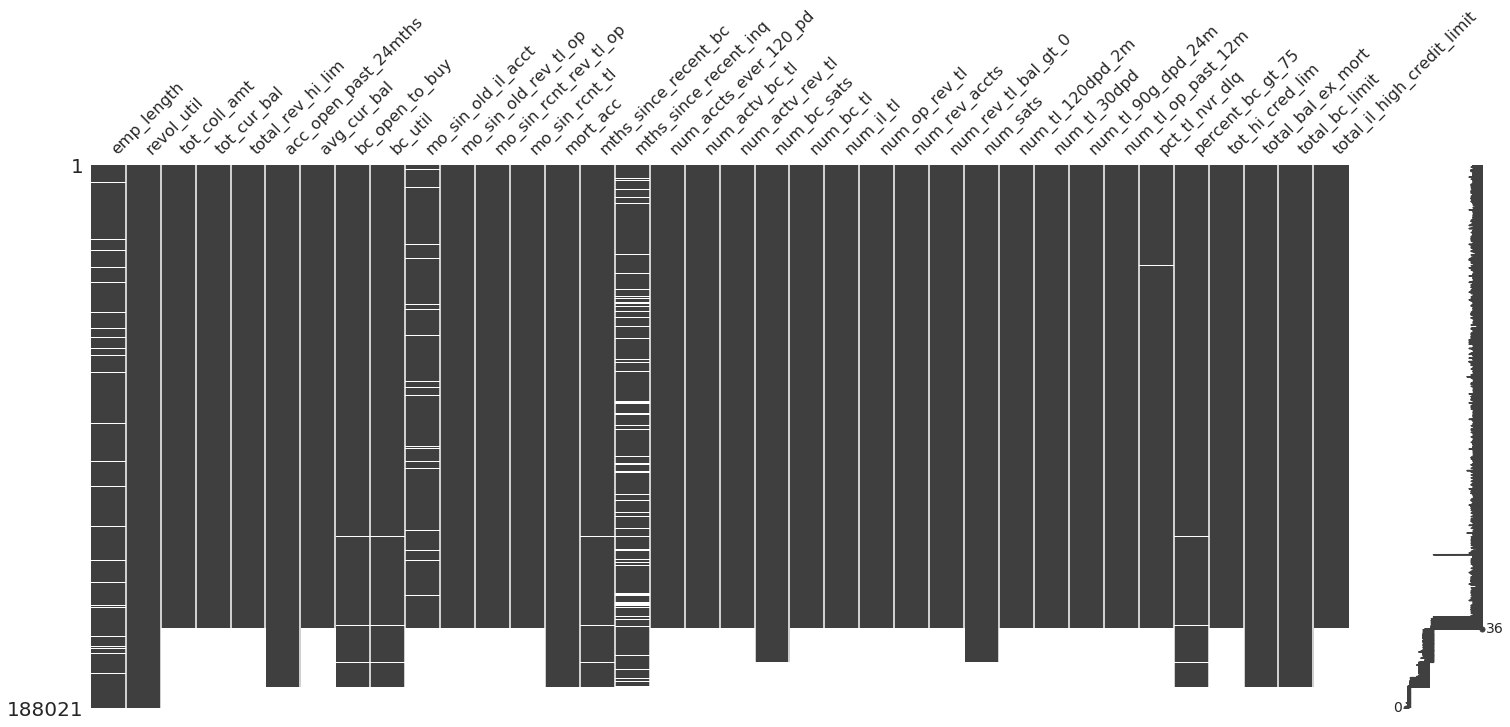

In [19]:
msno.matrix(df.select_dtypes(include = 'float64').loc[:,df.isnull().any()])
plt.show()

In [20]:
def outlier_remove(df, cols):
    '''
    This functions removes outliers more than 4 standard deviations of mean
    
    '''
    for col in cols:
        v = df[col]
        df = df[~((v-v.mean()).abs() > 4 * v.std())]
    
    return df

In [21]:
cols = ['tot_cur_bal', 'total_rev_hi_lim', 'avg_cur_bal', 'bc_open_to_buy', 'tot_hi_cred_lim',
        'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit', 'annual_inc', 'revol_bal',
       ]

df = outlier_remove(df, cols = cols)

In [22]:
col_mean = ['revol_util', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim','avg_cur_bal',
            'bc_open_to_buy','bc_util', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
            'total_il_high_credit_limit', 'pct_tl_nvr_dlq','percent_bc_gt_75']

col_median = [x for x in df.select_dtypes('float64').loc[:,df.select_dtypes('float64').isna().any()].columns if x not in col_mean]

In [23]:
# mean impute
im_mean = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
im_mean.fit(df[col_mean])
df[col_mean] = im_mean.transform(df[col_mean])

# median impute
im_median = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
im_median.fit(df[col_median])
df[col_median] = im_median.transform(df[col_median])

### Uniqueness

In [24]:
col_to_check = ['loan_amnt', 'term', 'int_rate', 'grade', 'emp_title', 
                'emp_length', 'home_ownership', 'annual_inc', 'issue_d', 'purpose', 'zip_code']
df[df.duplicated(subset = col_to_check)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,delinq_time


* There are 0 duplicated records

### Validity

In [25]:
# Categorical
# col_cat = df.select_dtypes('object').columns.tolist()
# for col in col_cat:
#    print('-----------{}----------'.format(col))
#    print(df[col].value_counts())

In [26]:
exclude = ['emp_title', 'title', 'zip_code', 'debt_settlement_flag']

df.drop(exclude, axis = 1, inplace = True)

In [27]:
cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for col in cols:
    df[col] = pd.to_datetime(df[col])

* At this step we are check for two things
    * Is the variable in the correct data types
    * Are there any outliers/unrealistic data points

## EDA

- [Univariate Analysis](#Univariate-Analysis)
- [Multivariate Analysis](#Univriate-Analysis)

In [28]:
def plot_distribution(df, df1, df2, x, y, label1 = None, label2 = None, bins = 5000, xlim = None, ylim = None, ):   
    '''
    This functions plots the distribution of numerical variable by a categorical variable
    
    '''
    fig, axes = plt.subplots(nrows = 2, figsize = (15,8))
    ax1 = sns.distplot(df1[y], label = label1, bins = bins, ax = axes[0])
    ax1 = sns.distplot(df2[y], label = label2, bins = bins, ax = axes[0])
    ax2 = sns.boxplot(x = x, y = y, data = df)

    if ylim != None: 
        ax1.set_ylim(0,ylim)
   
    if xlim != None:
        ax1.set_xlim(0,xlim)
    
    ax1.set_title("Distribution of {} by {}".format(y,x))
    ax1.set_xlabel(y)
    ax2.set_xlabel(x)
    ax2.set_ylabel(y)
    ax1.legend(fontsize = 'large',frameon=False)
    
    # ax1.set_yscale('log')
    sns.despine(left=True)
    plt.tight_layout()
    plt.show()

In [29]:
def plot_pie(df, col, labels = None, explode = None):
    '''
    This function plots pie chart of categorical variable
    
    '''
    fig, axes = plt.subplots(figsize = (15,8))
    ax = df[col].value_counts().plot.pie(explode = explode, autopct = '%1.0f%%', 
                                               startangle = 90, fontsize = 20, labels = labels )
    
    ax.axis('equal')
    if labels != None:
        ax.set_xticklabels(labels)
        plt.legend(loc = 'upper left',fontsize = 'large',frameon=False)
    plt.title('Percentages of {}'.format(col))
    sns.despine()
    plt.tight_layout()
    plt.show()

In [30]:
def plot_count(df, col, hue = None, dodge = True, order = None, hue_order = None):
    '''
    Input: data frame, variable name
    Output: Countplot of variable of interest
    
    '''
    fig, ax = plt.subplots(figsize = (15,8))
    sns.countplot(x = col, data = df, hue = hue, dodge = dodge, order = order, hue_order = hue_order, palette = 'Reds')
    
    plt.title('Barplot of {}'.format(col))
    sns.despine()
    plt.tight_layout()
    plt.show()

###  Univariate Analysis

#### Business Performance

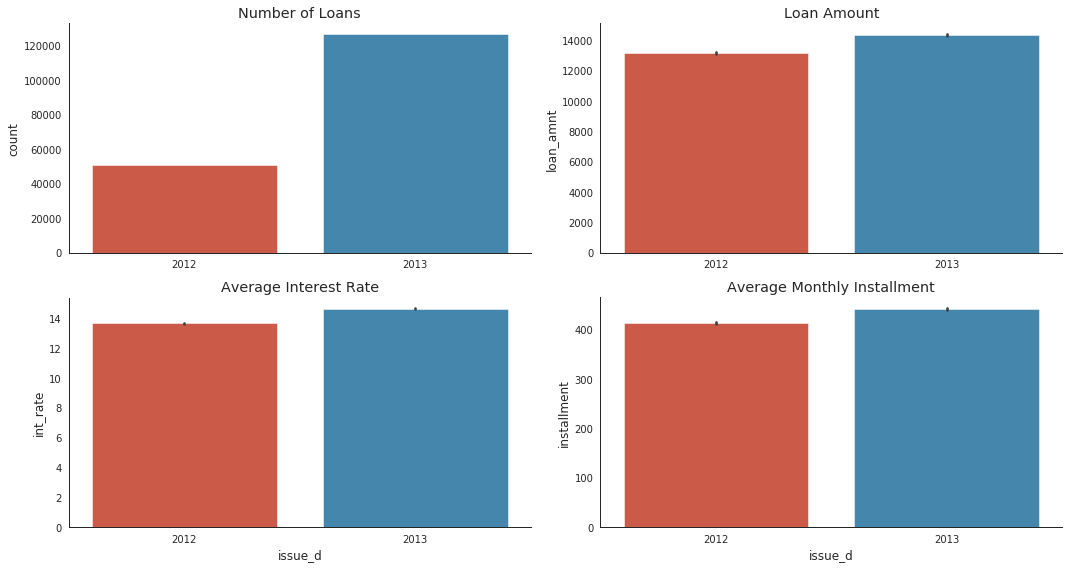

In [31]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize = (15,8))
ax1 = sns.countplot(x = df['issue_d'].dt.year, ax = ax1)
ax2 = sns.barplot(x = df['issue_d'].dt.year, y = df['loan_amnt'], ax = ax2)
ax3 = sns.barplot(x = df['issue_d'].dt.year, y = df['int_rate'], ax = ax3)
ax4 = sns.barplot(x = df['issue_d'].dt.year, y = df['installment'], ax = ax4)

ax1.set_title('Number of Loans')
ax2.set_title('Loan Amount')
ax3.set_title('Average Interest Rate')
ax4.set_title('Average Monthly Installment')
ax1.set_xlabel('')
ax2.set_xlabel('')
sns.despine()
plt.tight_layout()
plt.show()

* The business is growing from 2012 to 2013 from various perspectives.

#### Loan Term

In [32]:
count = [i for i in df['term'].value_counts()]
attr = ['36 Months', '60 Months']
pie = Pie('',title_pos = '30%', width = 800)
pie.add('',attr, count, is_label_show = True, legend_orient = 'vertical', legend_pos = '60%')
pie

#### Grade


In [33]:
count = list(df['grade'].value_counts().sort_index())
attr = list(df['grade'].value_counts().sort_index().index)
pie = Pie("", title_pos = '30%', width = 800)
pie.add('', attr, count, is_label_show = True, legend_orient = 'vertical', legend_pos = '70%')

#### Purpose

In [34]:
count = list(df['purpose'].value_counts().sort_index())
attr = list(df['purpose'].value_counts().sort_index().index)
pie = Pie("", title_pos = '5%', width = 800)
pie.add('', attr, count, is_label_show = True,  legend_orient = 'vertical', legend_pos = '81%' )

#### Response Variable: Loan Status

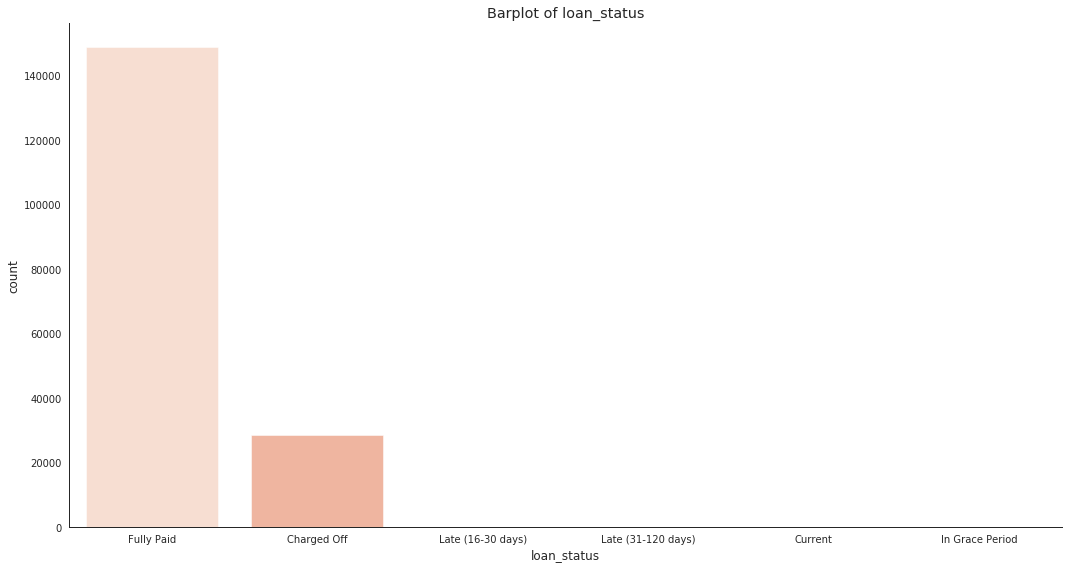

In [35]:
plot_count(df, 'loan_status')

In [36]:
df = df[~((df.loan_status == 'Current') | (df.loan_status == 'In Grace Period'))]
# create new variable loan status
df['loan_status'] = [0 if x == 'Fully Paid' else 1 for x in df.loan_status]
df['loan_status'] = df['loan_status'].astype('object')

In [37]:
count = list(df['loan_status'].value_counts().sort_index())
attr = ['Good Loans', 'Bad Loans']
pie = Pie("", title_pos = '5%', width = 800)
pie.add('', attr, count, is_label_show = True,  legend_orient = 'horizontal', legend_pos = 'center' )
pie

* 84% are good loans and 16% are bad loans

### Multivariate Analysis

#### Loan Amount and Loan Status

In [38]:
df_good = df[df.loan_status == 0]
df_bad = df[df.loan_status == 1]

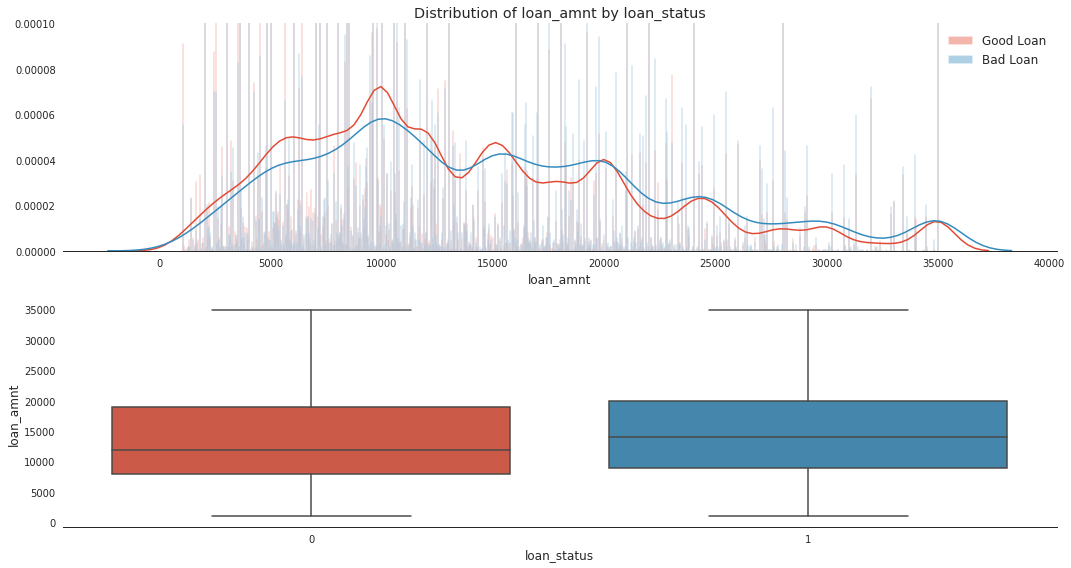

In [39]:
plot_distribution(df, df_good, df_bad, x =  'loan_status', y = 'loan_amnt', 
                  label1 = 'Good Loan', label2 = 'Bad Loan', bins = 1000, ylim = 0.0001)

#### Interest Rate and Loan Status

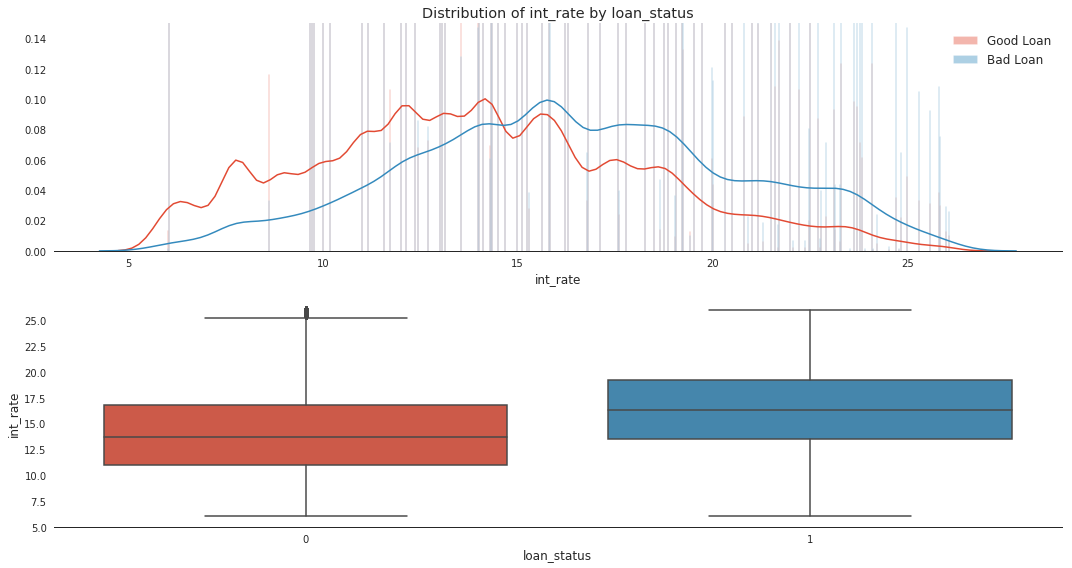

In [40]:
plot_distribution(df, df_good, df_bad, x =  'loan_status', y = 'int_rate', 
                  label1 = 'Good Loan', label2 = 'Bad Loan', bins = 1000, ylim = 0.15)

In [41]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)

In [42]:
# Two sample z test
z, p = twoSampZ(df_bad['int_rate'].mean(), df_good['int_rate'].mean(), 0, 
         sd1 = np.std(df_bad['int_rate']), sd2 = np.std(df_good['int_rate']),
        n2 = df_good.shape[0], n1 = df_bad.shape[0])

print('The Z-test statistic is {} and the p-value is {:.5f}'.format(z,p))

The Z-test statistic is 88.873 and the p-value is 0.00000


#### Annual Income and Loan Status

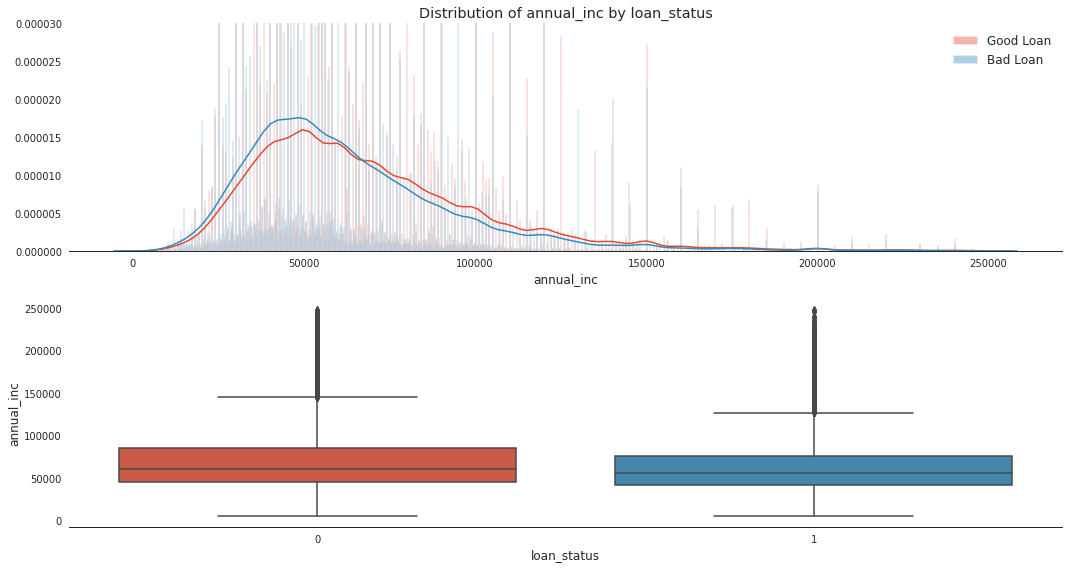

In [43]:
plot_distribution(df, df_good, df_bad, x =  'loan_status', y = 'annual_inc', 
                  label1 = 'Good Loan', label2 = 'Bad Loan', bins = 1000, ylim = 0.00003)

In [44]:
map_dict = {' 36 months': '36 months', ' 60 months':'60 months'}
df.term = df.term.replace(map_dict)

#### Term and Loan Status

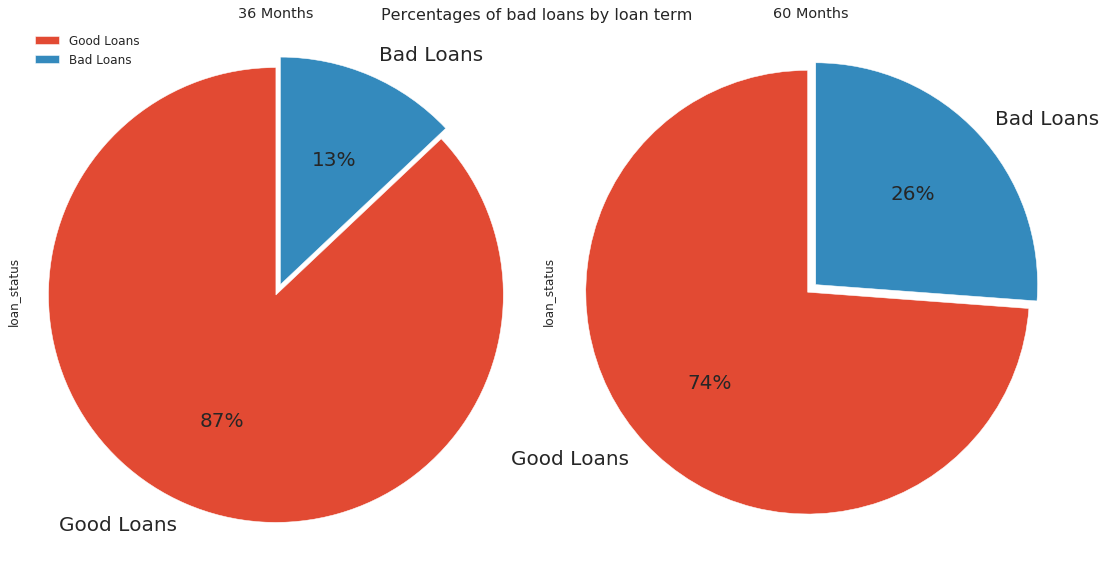

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,8))
ax1 = df[df['term'] == '36 months'].loan_status.value_counts().plot.pie(explode = [0, 0.05], autopct = '%1.0f%%',
                                                                       startangle = 90, fontsize = 20, 
                                                                         labels = ['Good Loans','Bad Loans'], ax = ax1)

ax2 = df[df['term'] != '36 months'].loan_status.value_counts().plot.pie(explode = [0, 0.05], autopct = '%1.0f%%',
                                                                       startangle = 90, fontsize = 20, 
                                                                         labels = ['Good Loans','Bad Loans'], ax = ax2)


fig.suptitle('Percentages of bad loans by loan term', fontsize = 16)
ax1.set_title('36 Months')
ax2.set_title('60 Months')
ax1.axis('equal')
ax2.axis('equal')
ax1.legend(loc = 'upper left',fontsize = 'large',frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

####  Grade and Loan Status

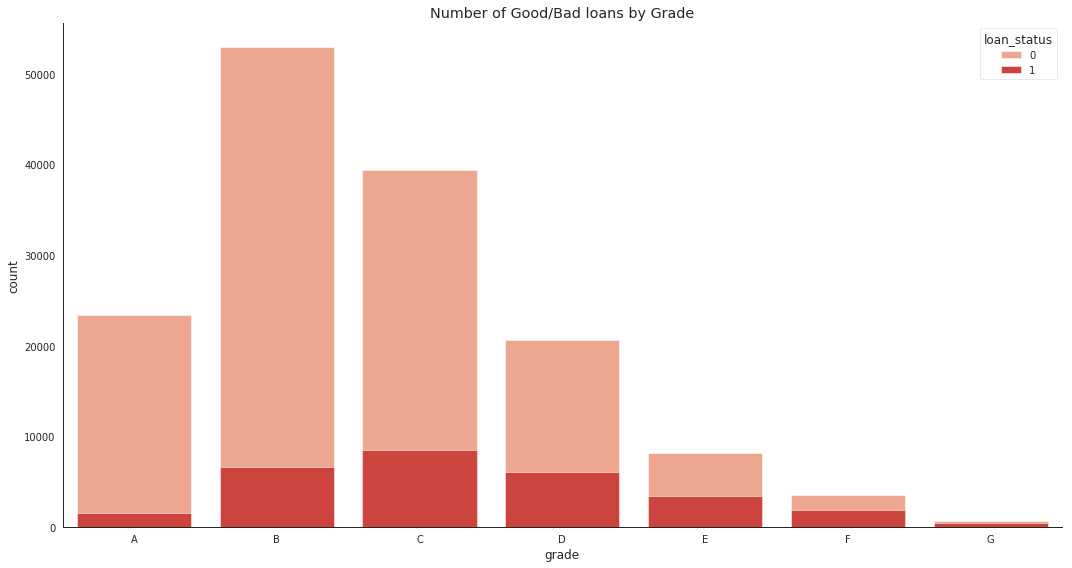

In [46]:
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(x = 'grade', data = df, hue = 'loan_status', dodge = False, 
                  order = ['A','B','C','D','E','F','G'], hue_order = [0,1], palette = 'Reds')
    
plt.title('Number of Good/Bad loans by Grade')
sns.despine()
plt.tight_layout()
plt.show()

In [47]:
from scipy.stats import chi2_contingency, chi2
import statsmodels.api as sm
table = sm.stats.Table.from_data(df[['grade', 'loan_status']])
tab = table.table_orig # get original contigency table
stat, p, dof, expected = chi2_contingency(tab)
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (Fail to Reject)')

Dependent (reject H0)


#### Grade and Interest Rate

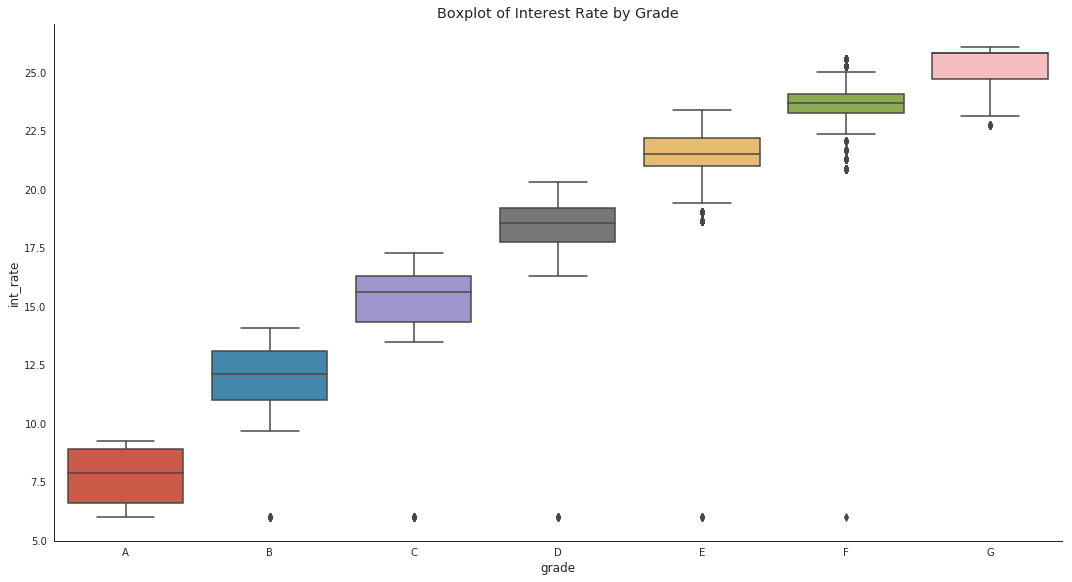

In [48]:
fig, axes = plt.subplots(figsize = (15,8))
sns.boxplot(x = 'grade', y = 'int_rate', data = df, order = ['A','B','C','D','E','F','G'])
sns.despine()
plt.tight_layout()
plt.title('Boxplot of Interest Rate by Grade')
plt.show()

## Feature Engineering

- [Feature Creation](#Feature-Creation)
- [Feature Extraction](#Feature-Extraction)
- [Feature Selection](#Feature-Selection)
- [Feature Scaling](#Feature-Scaling)

In [49]:
df.loan_status = df.loan_status.astype('int')

### Feature Creation

In [50]:
# credit length, group 0: 3 - 14 years, group 1: 14 - 63 years
temp = df.issue_d.dt.year - df.earliest_cr_line.dt.year
df['credit_length'] = pd.qcut(temp, 2, labels = False).astype('object')

In [51]:
# monthly installment / monthly income
df['installment_feat'] = df['installment'] / (df['annual_inc'] / 12)

### Feature Extraction

In [52]:
# emp_length: group 0: < 10, group 1: >= 10
df.emp_length = df.emp_length.apply(lambda x: (0,1)[x == 10]).astype('object')

In [53]:
# delinq_2yrs: group 0: no default, group 1: default
df.delinq_2yrs = df.delinq_2yrs.apply(lambda x: (0, 1)[x != 0]).astype('object')

In [54]:
# pub_rec: Number of derogatory pub record
df.pub_rec = df.pub_rec.apply(lambda x: (0, 1)[x != 0]).astype('object')

In [55]:
# inq_last_6mths: group 0: dont have, group 1: have
df.inq_last_6mths = df.inq_last_6mths.apply(lambda x: (0, 1)[x != 0]).astype('object')

In [56]:
# open account: 0: <= 10 accounts, group 1: > 10 accounts
df.open_acc = pd.qcut(df['open_acc'], q = 2, labels = [0,1]).astype('object')

In [57]:
# home_ownership and purpose
map_list = {
    'purpose':{
        'renewable_energy':'other',
        'moving':'home_improvement',
        'house':'home_improvement',
        'vacation':'other',
        'wedding': 'other'},
    'home_ownership':{
        'OTHER':'MORTGAGE',
        'NONE':'MORTGAGE'
    }
}

df[['purpose','home_ownership']] = df[['purpose','home_ownership']].replace(map_list)

In [58]:
# Drop Irrelevant features
col_exclude = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'sub_grade', 'addr_state']

df.drop(col_exclude, axis = 1, inplace = True)

### Feature Scaling

#### Dummy Coding

In [59]:
cat_col = df.select_dtypes('object').columns.tolist()

dummy_df = pd.get_dummies(df[cat_col])
df = pd.concat([df, dummy_df], axis = 1)
df = df.drop(cat_col, axis = 1)

#### Standardization

In [60]:
col = df.select_dtypes('float64').columns

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df[col] = sc.fit_transform(df[col])

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,installment_feat,term_36 months,term_60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_0,emp_length_1,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,delinq_2yrs_0,delinq_2yrs_1,inq_last_6mths_0,inq_last_6mths_1,open_acc_0,open_acc_1,pub_rec_0,pub_rec_1,initial_list_status_f,initial_list_status_w,delinq_time_0,delinq_time_1,delinq_time_2,credit_length_0,credit_length_1
0,-0.254098,-0.253850,-0.252597,-1.769860,-0.277778,1.143209,0,-0.407004,-0.133096,-1.650745,-0.189267,-0.005496,-0.005496,-0.252938,-0.251887,-0.056995,-0.576997,-0.130309,-0.23389,-0.177894,-0.647436,-0.053435,-0.045239,-0.098347,1.322159,2.209454,0.027785,1.246327,3.646621,-1.709438,-0.064675,-0.014906,0.468467,0.800431,0.465799,-0.611867,1.111947,-0.171017,-0.712368,-0.319055,-0.852538,-1.335539,0.205313,-0.864394,0.291900,0.040810,-0.845512,-1.338970,0.275433,-0.018487,...,0.133036,0.023313,-1.643186,-0.299176,-0.056274,1.546127,0.157795,2.454324,0.433350,-1.045693,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1
2,1.653496,1.654310,1.656842,-0.771640,1.921421,-0.379746,0,0.761229,2.186565,0.105487,0.275601,-0.005496,-0.005496,1.509998,1.512243,1.823230,0.412948,-0.130309,-0.23389,-0.177894,0.356351,-0.053435,-0.045239,-0.098347,-0.057583,2.133308,-0.359574,-0.231447,1.072791,-0.549410,-0.064675,-0.014906,-0.163265,1.907678,0.193710,-0.276860,1.111947,-0.312563,0.207416,-0.319055,-0.852538,-0.585411,-0.233930,-0.169444,0.120547,0.613906,0.055882,-0.590108,0.745470,-0.018487,...,-0.587333,0.679850,-0.887384,-0.299176,-0.056274,-0.065564,1.170609,1.250674,0.065331,2.706318,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1
3,-0.254098,-0.253850,-0.252597,-0.543215,-0.149869,1.904686,0,-0.542106,-0.366644,0.362712,-0.468188,-0.005496,-0.005496,-0.149716,-0.148594,-0.056995,-0.265344,-0.130309,-0.23389,-0.177894,-0.642145,-0.053435,-0.045239,-0.098347,1.860450,-0.639677,0.027785,2.071114,-0.374043,1.020040,-0.064675,-0.014906,1.056632,0.253028,-0.622558,-0.500198,0.631449,2.129101,-0.528412,-0.319055,-0.324638,-0.210347,-0.233930,-1.096044,0.120547,-0.818833,-0.995744,-0.215677,-0.429623,-0.018487,...,0.853406,0.679850,-1.612954,-0.299176,-0.056274,1.818181,0.221098,-0.529873,0.997974,-1.177863,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
4,-0.254098,-0.253850,-0.252597,-1.541435,-0.254425,0.884306,0,-0.597736,-0.125189,-0.138434,0.554522,-0.005496,-0.005496,-0.240200,-0.239140,-0.056995,-0.538537,-0.130309,-0.23389,-0.177894,-0.197258,-0.053435,-0.045239,-0.098347,0.714217,-0.157419,0.027785,-0.041257,-0.500273,0.638715,-0.064675,-0.014906,-0.032561,-0.680046,-0.214424,0.058147,-0.329547,-0.524882,0.575329,-0.319055,0.203262,-0.210347,-0.233930,0.293855,1.320016,0.040810,-0.094350,-0.215677,1.

### Feature Selection

- [Filtering](#Filtering): Based on correlation
- [Wrapper](#Wrapper): Recursive Feature Elimination
- [Embedded](#Embedded): Model based variable selection

#### Filtering

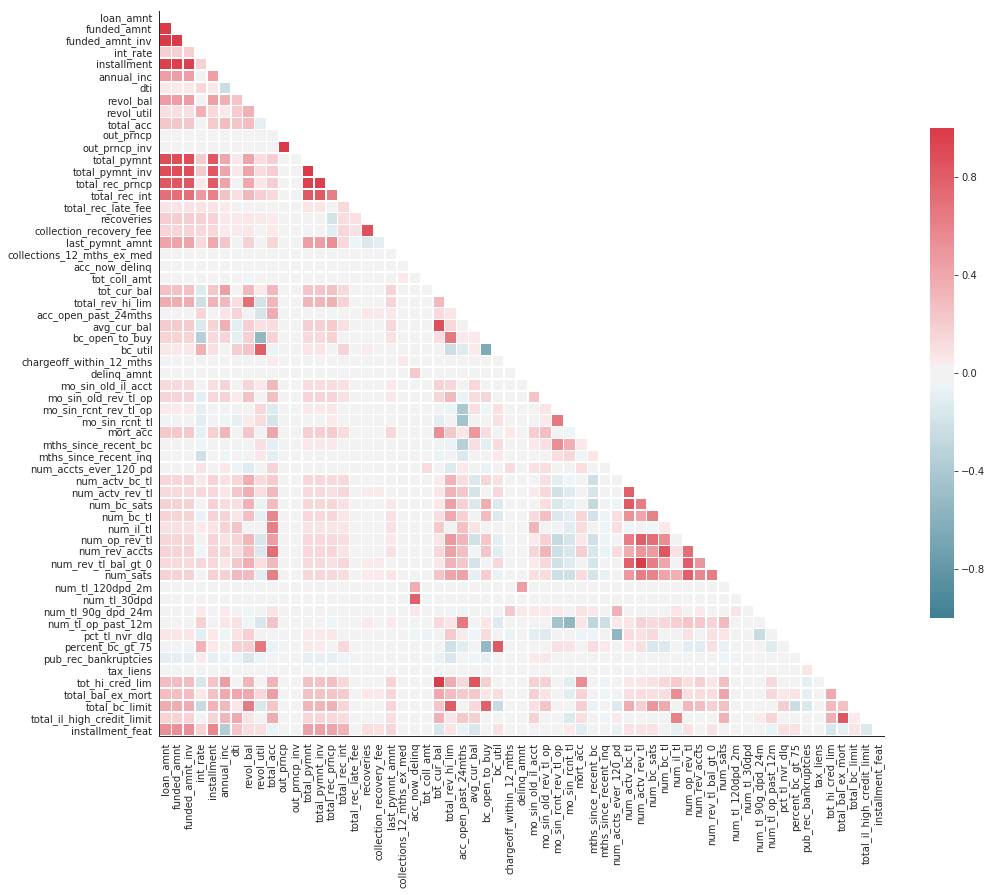

In [61]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.select_dtypes('float64').corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.select_dtypes('float64').corr(), mask=mask, cmap=cmap, vmax = 1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.despine()
plt.tight_layout()
plt.show()

In [62]:
col_drop = ['funded_amnt', 'funded_amnt_inv', 'total_pymnt_inv', 'out_prncp', 'collection_recovery_fee',
           'num_tl_30dpd', 'avg_cur_bal', 'bc_open_to_buy', 'num_rev_tl_bal_gt_0', 'num_bc_sats',
           'total_il_high_credit_limit', 'total_rev_hi_lim', 'percent_bc_gt_75', 'num_bc_tl', 
            'num_il_tl', 'num_rev_accts', 'num_sats', 'revol_util', 'tot_hi_cred_lim', 
            'num_actv_rev_tl','num_actv_bc_tl', 'mo_sin_old_rev_tl_op', 'recoveries', 'total_rec_prncp']

df = df.drop(col_drop, axis = 1)

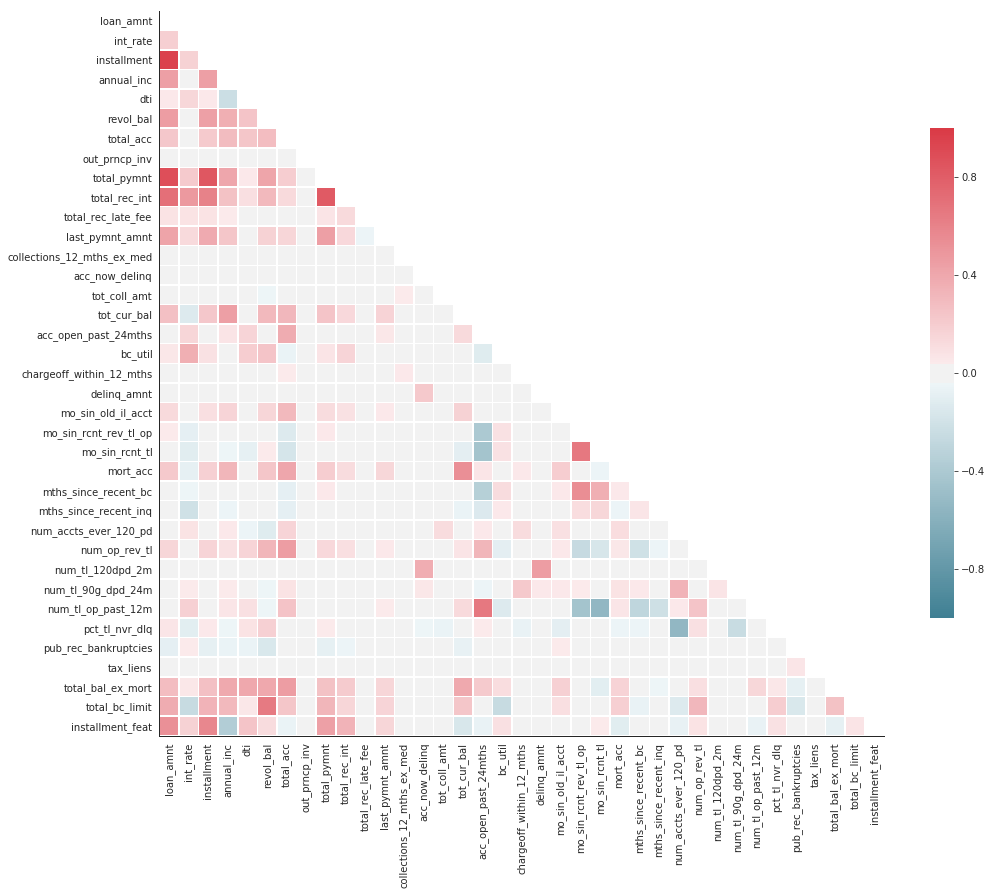

In [63]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.select_dtypes('float64').corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.select_dtypes('float64').corr(), mask=mask, cmap=cmap, vmax = 1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.despine()
plt.tight_layout()
plt.show()

#### Wrapper

In [64]:
X = df.drop('loan_status', axis = 1)
y = df['loan_status']

In [65]:
lr = LogisticRegression()
rfe = RFE(lr, 30, step = 2)
rfe = rfe.fit(X, y)

In [66]:
selected = X.columns[rfe.support_].tolist()

In [67]:
print(selected)

['loan_amnt', 'installment', 'annual_inc', 'out_prncp_inv', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'installment_feat', 'term_36 months', 'term_60 months', 'grade_E', 'grade_F', 'grade_G', 'emp_length_0', 'emp_length_1', 'purpose_major_purchase', 'purpose_medical', 'delinq_2yrs_0', 'delinq_2yrs_1', 'inq_last_6mths_0', 'inq_last_6mths_1', 'open_acc_0', 'open_acc_1', 'pub_rec_0', 'pub_rec_1', 'initial_list_status_f', 'initial_list_status_w', 'credit_length_0', 'credit_length_1']


#### Embedded

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, random_state = 123)
rf.fit(X[selected], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

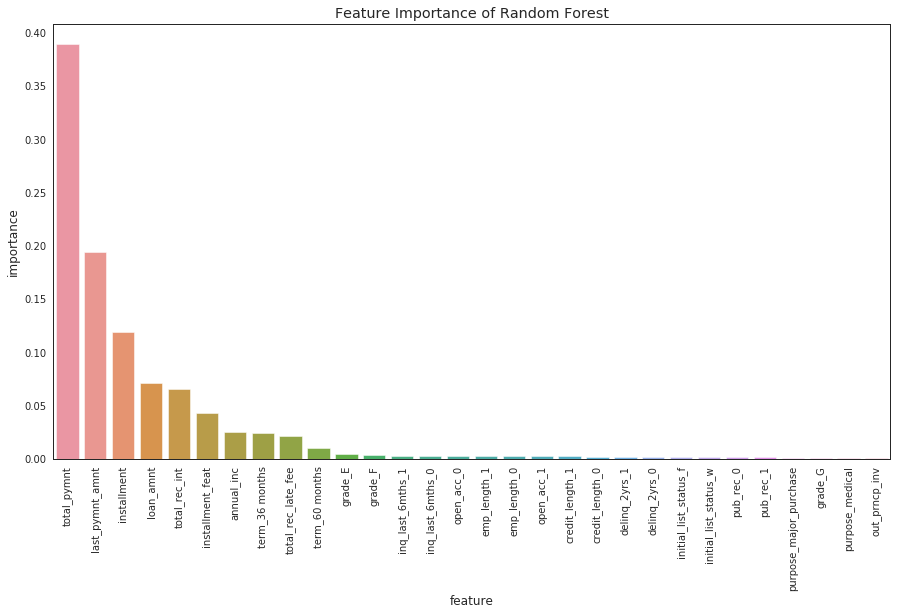

In [69]:
impor = pd.DataFrame({
    'feature': X[selected].columns,
    'importance': rf.feature_importances_
})
impor = impor.sort_values('importance', ascending = False)

fig, axes = plt.subplots(figsize = (15,8))
sns.barplot(x = 'feature', y = 'importance', data = impor)
plt.xticks(rotation = 90)
plt.title('Feature Importance of Random Forest')
plt.show()

## Modeling and Evaluation

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Fallout (FPR) = {:.3f}'.format(fp/(fp+tn)))
    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

### Train Test Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X[selected],
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 123)

### Logistic Regression

In [72]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

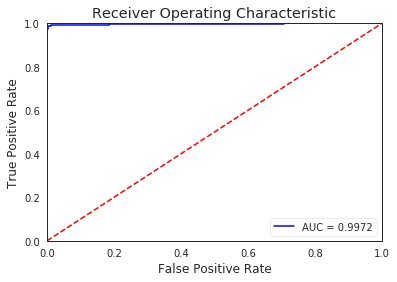

In [73]:
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

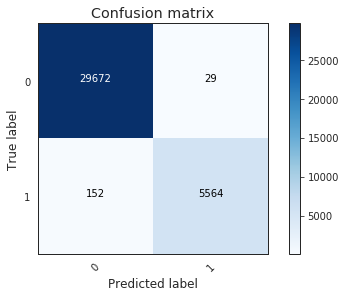

Precision =     0.995
Recall (TPR) =  0.973
Fallout (FPR) = 0.001


In [74]:
thresh = 0.2
y_pred = [1 if x > thresh else 0 for x in probs[:,1]]
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

### Random Forest

In [75]:
rf = RandomForestClassifier(n_estimators = 50,
                            max_features = 3,
                            max_depth = 3,
                            criterion = 'gini',
                            random_state = 123,
                           oob_score = True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

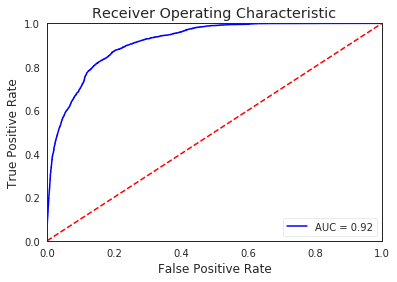

In [76]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

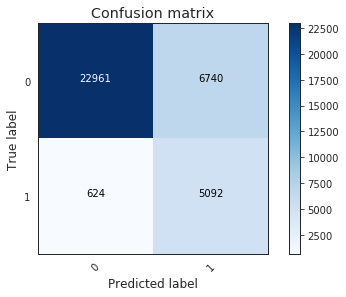

Precision =     0.430
Recall (TPR) =  0.891
Fallout (FPR) = 0.227


In [77]:
thresh = 0.175
y_pred = [1 if x > thresh else 0 for x in probs[:,1]]
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

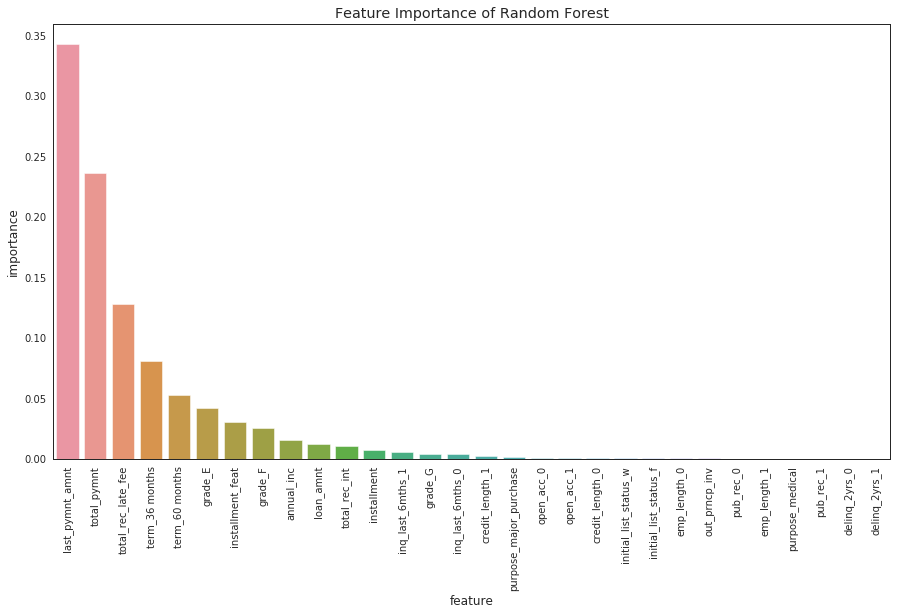

In [78]:
impor = pd.DataFrame({
    'feature': X[selected].columns,
    'importance': rf.feature_importances_
})
impor = impor.sort_values('importance', ascending = False)

fig, axes = plt.subplots(figsize = (15,8))
sns.barplot(x = 'feature', y = 'importance', data = impor)
plt.xticks(rotation = 90)
plt.title('Feature Importance of Random Forest')
plt.show()

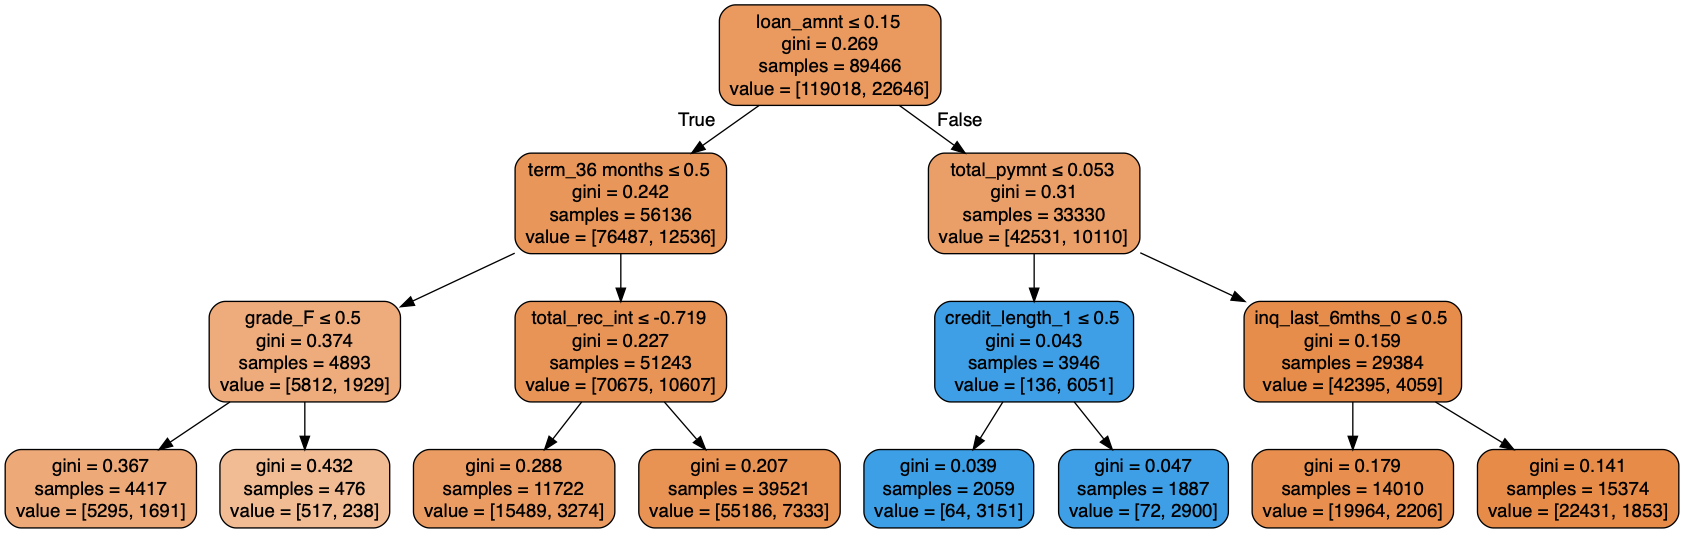

In [88]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(rf[0], out_file = dot_data,  
                filled = True, feature_names = X[selected].columns.tolist(), 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 5)

dt.fit(X[selected], y)
y_pred = dt.predict(X_test)

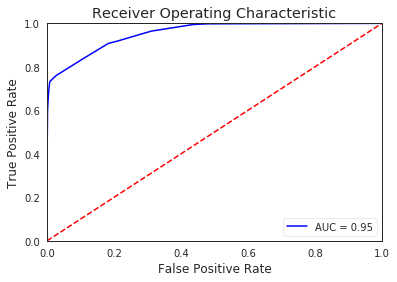

In [81]:
# calculate the fpr and tpr for all thresholds of the classification
probs = dt.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

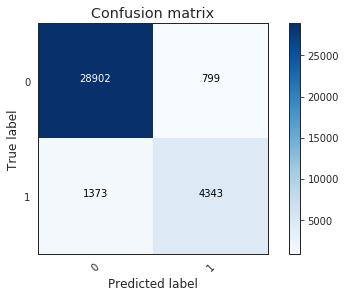

Precision =     0.845
Recall (TPR) =  0.760
Fallout (FPR) = 0.027


In [83]:
thresh = 0.175
y_pred = [1 if x > thresh else 0 for x in probs[:,1]]
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['0', '1'], )
pr, tpr, fpr = show_data(cm, print_res = 1);

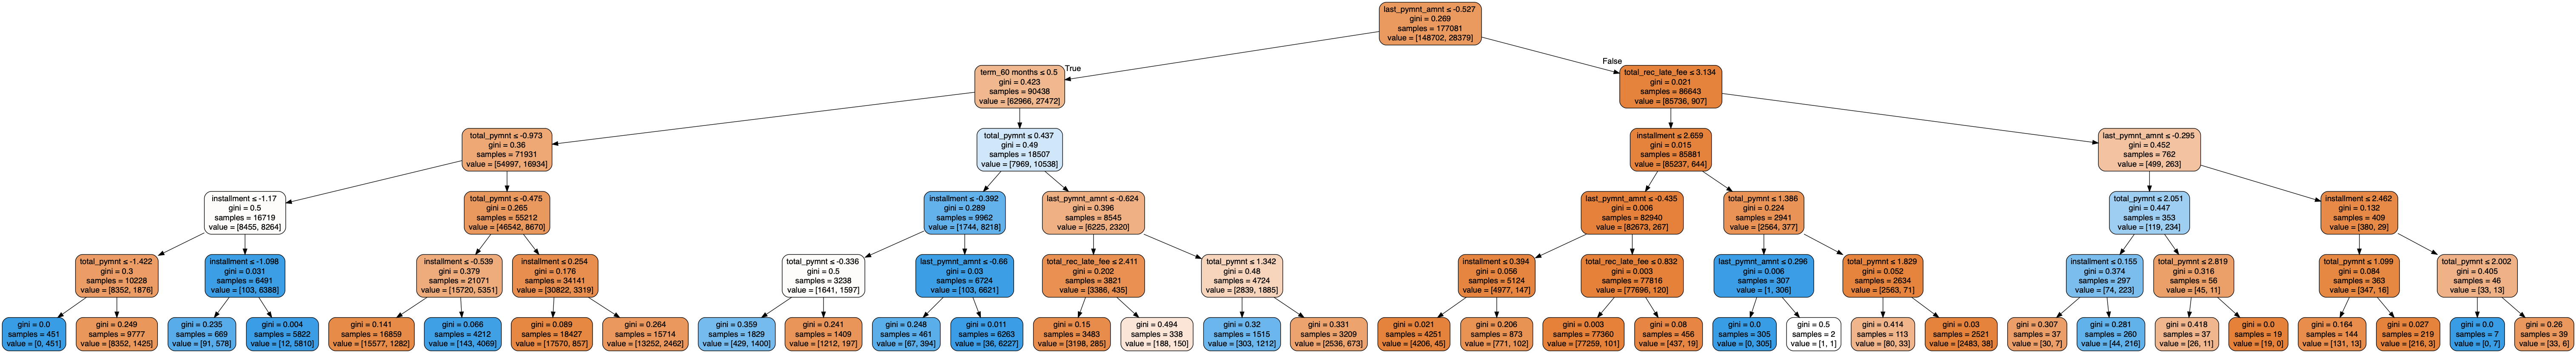

In [89]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file = dot_data,  
                filled = True, feature_names = X[selected].columns.tolist(), 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Recommendation

* Feature Selection using Recursive Feature Elimination with cross-validation to determine number of features to use
* Gather more data, more recent years
* Hyper-parameter tuning for Logistic Regression Model (L1, L2)
* Oversampling (SMOTE) and undersampling to deal with class imbalance